# 01. 머신러닝 훑어보기

붓꽃의 품종을 분류하는 문제를 머신러닝 알고리즘으로 어떻게 해결하는지 살펴봅니다.

* **분석데이터**:
  https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris



* **머신러닝 과정의 이해**

  1. 데이터 전처리: EDA, 결측치처리, 이상치처리, 데이터분할, 데이터 인코딩, 정규화, 표준화
  2. 학습 : 분류(결정트리)
  3. 평가 : 정확도(Accuracy)
  4. 적용

  

* **sklearn 패키지 기본 사용법 이해하기**



## Step0. 준비

### 라이브러리 로딩

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

### 데이터 로딩

In [3]:
iris = load_iris()

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Step1. 데이터 전처리

### EDA

In [10]:
# 데이터프레임의 요약 정보
'''
코드를 작성해주세요
'''
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


- 데이터는 총 150개의 로우로 구성되어있으며, 컬럼은 5개가 존재한다.
- 각 컬럼의 결측치는 존재하지 않는다.

- sepal length : 꽃받침의 길이
- sepal width : 꽃받침의 너비
- petal length : 꽃잎의 길이
- petal width : 꽃잎의 너비
- label : 품종

In [11]:
# 데이터프레임의 통계 정보 
'''
코드를 작성해주세요
'''
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [12]:
# 품종(label) 카테고리 확인
iris_df['label'].unique()

array([0, 1, 2])

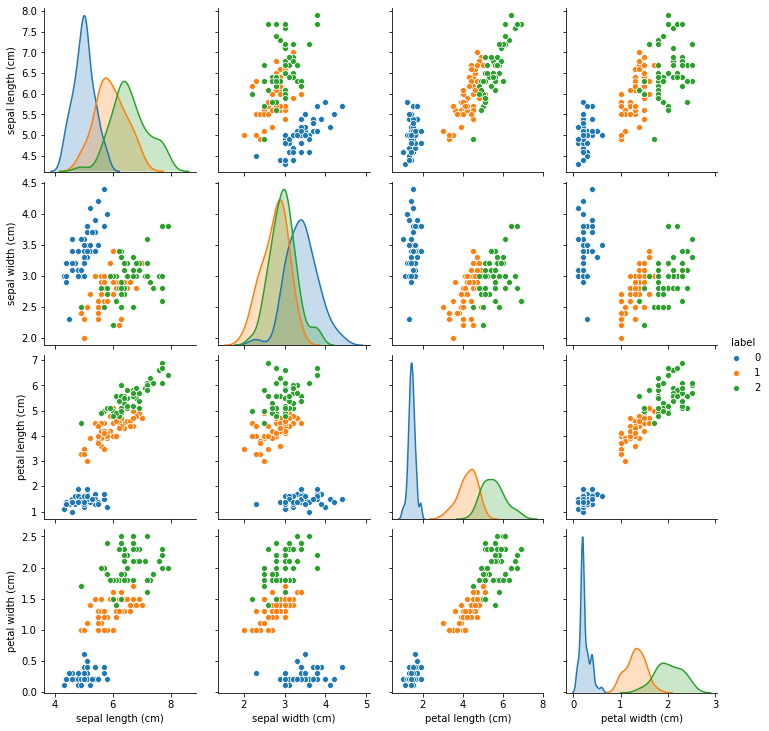

In [14]:
# iris 데이터의 pairplot
sns.pairplot(iris_df, hue='label')

### 결측치처리
 - 결측치가 존재하지 않음으로 생략

In [15]:
# 결측치 확인
'''
코드를 작성해주세요
'''
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
label                0
dtype: int64

### 데이터분할

In [21]:
X = iris_df.iloc[:, :4]
y = iris_df['label']

# 학습용 데이터와 테스트용 데이터로 나눔
'''
코드를 작성해주세요
'''
trainX, testX, trainY, testY = train_test_split(X,y) # 함수 document 보고 싶을 떄 shift + tab 누르면 : doc 확인 가능 

In [17]:
len(trainX)

112

In [19]:
len(testX)

38

# esc + a : code cell 위에 추가 
# esc + b : code cell 아래에 추가 

## Step2. 학습

In [24]:
# DecisionTreeClassifier 객체 생성 
model = DecisionTreeClassifier(random_state=11)



DecisionTreeClassifier(random_state=11)

In [25]:
# 학습 수행 
'''
코드를 작성해주세요
'''
model.fit (trainX, trainY)

DecisionTreeClassifier(random_state=11)

## Step3. 평가

In [27]:
#테스트용 데이터로 모델 평가
score = model.score(testX, testY)
score

0.9473684210526315

## Step4. 적용

In [30]:
import numpy as np
data = np.array([
    [5.4, 4, 1.5, 0.2],
    [6.2 , 2.7, 5.1, 1.6],
    [6.5, 3.1 , 5.2, 2. ]
])

'''
코드를 작성해주세요
'''
y_pred = model.predict(data)
y_pred

array([0, 1, 2])

# 02. 정규화, 표준화

## 원본 데이터 분포

In [31]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_data = iris.data
df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 표준화 진행
* mean: 0, std: 1

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # 평균과 표준편차를 활용하여 표준화가 진행 된다. 
scaler.fit(df)
scaled_array = scaler.transform(df)

scaled_df = pd.DataFrame(data=scaled_array, columns=iris.feature_names)
scaled_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.690315e-15,-1.842970e-15,-1.698641e-15,-1.409243e-15
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


## 정규화 진행

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df)
scaled_array = scaler.transform(df)

scaled_df = pd.DataFrame(data=scaled_array, columns=iris.feature_names)
scaled_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000
